# Unsupervised Learning: Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs

### Creemos una nube de puntos aleatoria

In [47]:
points = make_blobs(n_samples=20, n_features=2, random_state=42, cluster_std=1.5)
df_points = pd.DataFrame(points[0], columns = ["x","y"])
df_points["number"] = np.arange(0,len(df_points),1)
df_points["label"] = [0]*len(df_points)
df_points.head()

,x,y,number,label
0,-3.213409,9.828126,0,0
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,0
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,0


### Grafiquemos los puntos

Text(0, 0.5, 'y')

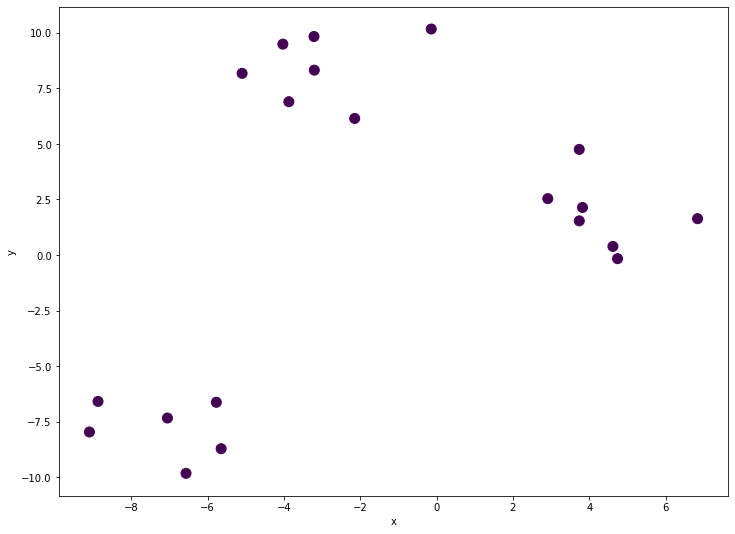

In [48]:
fig = plt.figure(figsize=(12, 9))
x = df_points["x"]
y = df_points["y"]
c = df_points["label"]
plt.scatter(x=x, y=y, s=100, c=c)
plt.xlabel("x")
plt.ylabel("y")

### Calculemos matriz de distancia

In [49]:
X = df_points[["x","y"]]

d = euclidean_distances(X, X)
np.fill_diagonal(d, np.Inf)
d = pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,inf,2.508557,0.884063,3.835220,9.523776,17.360971,1.512462,12.267800,10.422547,10.821294,19.931779,12.968166,16.648947,3.005177,17.584229,3.091488,18.735914,18.698387,12.771726,8.607199
1,2.508557,inf,1.693991,3.579252,9.793009,15.230988,1.897785,12.449870,10.767583,11.049534,18.050407,13.607584,14.809319,1.768374,15.625595,5.342494,16.619481,16.891162,12.893807,9.472543
2,0.884063,1.693991,inf,3.834953,9.822261,16.784495,1.431081,12.553168,10.752451,11.114626,19.471374,13.406262,16.202790,2.594594,17.087253,3.947044,18.167032,18.268767,13.039215,9.094971
3,3.835220,3.579252,3.834953,inf,6.214106,14.396753,2.415402,8.884203,7.188474,7.475008,16.564594,10.052959,13.272249,1.881556,14.341661,4.493613,15.724128,15.262370,9.339781,6.046178
4,9.523776,9.793009,9.822261,6.214106,inf,14.902871,8.415638,2.744860,0.992817,1.297567,15.573825,4.027322,12.622843,8.064302,14.025613,8.217231,15.951105,14.134336,3.261043,2.363157
5,17.360971,15.230988,16.784495,14.396753,14.902871,inf,15.941978,15.186255,15.403994,14.999154,3.972353,17.730468,3.100215,14.378268,1.966212,18.889432,1.393426,3.863929,15.051358,16.956021
6,1.512462,1.897785,1.431081,2.415402,8.415638,15.941978,inf,11.139333,9.355867,9.704530,18.444306,12.062073,15.157797,1.568685,16.113844,3.579012,17.309609,17.201216,11.620467,7.803156
7,12.267800,12.449870,12.553168,8.884203,2.744860,15.186255,11.139333,inf,1.925350,1.447727,15.142414,2.545579,12.534746,10.698825,13.993781,10.875814,16.056805,13.716870,0.563811,4.453264
8,10.422547,10.767583,10.752451,7.188474,0.992817,15.403994,9.355867,1.925350,inf,0.609791,15.841915,3.057055,12.994300,9.045888,14.422276,8.951291,16.399492,14.401624,2.479641,2.613448
9,10.821294,11.049534,11.114626,7.475008,1.297567,14.999154,9.704530,1.447727,0.609791,inf,15.334269,3.101008,12.530778,9.308395,13.967762,9.461637,15.966716,13.895116,1.973090,3.215958


In [50]:
idxmin_row = d.min().idxmin()
idxmin_col = d.iloc[idxmin_row,:].idxmin()
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,inf,2.508557,0.884063,3.835220,9.523776,17.360971,1.512462,12.267800,10.422547,10.821294,19.931779,12.968166,16.648947,3.005177,17.584229,3.091488,18.735914,18.698387,12.771726,8.607199
1,2.508557,inf,1.693991,3.579252,9.793009,15.230988,1.897785,12.449870,10.767583,11.049534,18.050407,13.607584,14.809319,1.768374,15.625595,5.342494,16.619481,16.891162,12.893807,9.472543
2,0.884063,1.693991,inf,3.834953,9.822261,16.784495,1.431081,12.553168,10.752451,11.114626,19.471374,13.406262,16.202790,2.594594,17.087253,3.947044,18.167032,18.268767,13.039215,9.094971
3,3.835220,3.579252,3.834953,inf,6.214106,14.396753,2.415402,8.884203,7.188474,7.475008,16.564594,10.052959,13.272249,1.881556,14.341661,4.493613,15.724128,15.262370,9.339781,6.046178
4,9.523776,9.793009,9.822261,6.214106,inf,14.902871,8.415638,2.744860,0.992817,1.297567,15.573825,4.027322,12.622843,8.064302,14.025613,8.217231,15.951105,14.134336,3.261043,2.363157
5,17.360971,15.230988,16.784495,14.396753,14.902871,inf,15.941978,15.186255,15.403994,14.999154,3.972353,17.730468,3.100215,14.378268,1.966212,18.889432,1.393426,3.863929,15.051358,16.956021
6,1.512462,1.897785,1.431081,2.415402,8.415638,15.941978,inf,11.139333,9.355867,9.704530,18.444306,12.062073,15.157797,1.568685,16.113844,3.579012,17.309609,17.201216,11.620467,7.803156
7,12.267800,12.449870,12.553168,8.884203,2.744860,15.186255,11.139333,inf,1.925350,1.447727,15.142414,2.545579,12.534746,10.698825,13.993781,10.875814,16.056805,13.716870,0.563811,4.453264
8,10.422547,10.767583,10.752451,7.188474,0.992817,15.403994,9.355867,1.925350,inf,0.609791,15.841915,3.057055,12.994300,9.045888,14.422276,8.951291,16.399492,14.401624,2.479641,2.613448
9,10.821294,11.049534,11.114626,7.475008,1.297567,14.999154,9.704530,1.447727,0.609791,inf,15.334269,3.101008,12.530778,9.308395,13.967762,9.461637,15.966716,13.895116,1.973090,3.215958


In [51]:
# fig = plt.figure(figsize=(12, 9))
iterations = int((d.shape[0]**2-d.shape[0])/2)

for i in range(1, iterations):
    ### Find minimum distance
    idxmin_row = d.min().idxmin()
    idxmin_col = d.iloc[idxmin_row,:].idxmin()
    d.iloc[idxmin_row, idxmin_col] = d.iloc[idxmin_col, idxmin_row] = np.Inf

    if (df_points.loc[idxmin_row, "label"]==0 and df_points.loc[idxmin_col, "label"]==0):

        ### Re-label with new label equal to index
        df_points.loc[idxmin_row, "label"] = i
        df_points.loc[idxmin_col, "label"] = i
        #print(i)

    elif (df_points.loc[idxmin_row, "label"]!=0 and df_points.loc[idxmin_col, "label"]==0):
        label = idxmin_row

        ### Re-label with pre-existing label
        df_points.loc[idxmin_col, "label"] = label
        
        #print(i) 
        
    elif (df_points.loc[idxmin_row, "label"]==0 and df_points.loc[idxmin_col, "label"]!=0):
        label = idxmin_col

        ### Re-label with pre-existing label
        df_points.loc[idxmin_row, "label"] = label
        
        #print(i)
        
    else:
        label_min = min(idxmin_row, idxmin_col)
        label_max = max(idxmin_row, idxmin_col)    
        
        ### Re-label with pre-existing label
        df_points.loc[:,"label"].replace(to_replace=label_max, value=label_min)
        
        #print(i)
    
#     x = df_points["x"]
#     y = df_points["y"]
#     c = df_points["label"]
#     cmap = plt.cm.Spectral
#     plt.scatter(x=x, y=y, s=100, c=c)
#     plt.show()
#   
    display(df_points)
    time.sleep(3)

,x,y,number,label
0,-3.213409,9.828126,0,0
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,0
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,0
5,-8.871906,-6.584818,5,0
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,0
9,3.738921,1.535629,9,0


,x,y,number,label
0,-3.213409,9.828126,0,0
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,0
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,0
5,-8.871906,-6.584818,5,0
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,0
5,-8.871906,-6.584818,5,0
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,0
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,0
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,0
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,0
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,0
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2


KeyboardInterrupt: 

In [39]:
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
5,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
6,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
8,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
9,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [40]:
df_points

,x,y,number,label
0,-3.213409,9.828126,0,3
1,-5.096574,8.170855,1,2
2,-4.028444,9.485657,2,3
3,-2.146254,6.144366,3,13
4,2.913388,2.536717,4,8
5,-8.871906,-6.584818,5,6
6,-3.204324,8.315691,6,2
7,4.619633,0.386603,7,1
8,3.823305,2.139554,8,2
9,3.738921,1.535629,9,2
